In [116]:
# Libraries imported successfully
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost as xgb
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

# Load the weather classification dataset
weather_df = pd.read_csv('Dataset/weather_classification_data.csv')

# Data Shape
print("Data Shape : \n")
print(f"Dataset shape: {weather_df.shape}")
print(f"Number of rows: {weather_df.shape[0]}")
print(f"Number of columns: {weather_df.shape[1]} \n")

# Display first few rows of the dataset
print("First 10 rows of the dataset: \n")
weather_df.head(10)


Data Shape : 

Dataset shape: (13200, 11)
Number of rows: 13200
Number of columns: 11 

First 10 rows of the dataset: 



,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [117]:
# Display basic information about the dataset
print("Data types details :")
weather_df.info()

# Categorical features (nominal)
categorical_features = weather_df.select_dtypes(include=['object']).columns.tolist()
print(f"\nTotal 4 Categorical Features : ")
print(categorical_features)

print(f"\nCategorical Features Values: ")
for col in categorical_features:
    unique_values = weather_df[col].unique()
    print(f"{col}: {unique_values}")

# Numerical features (continuous)
numerical_features = weather_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nTotal 7 Numerical Features : ")
print(numerical_features)

# Check for ordinal features (categorical with inherent order)
print(f"\nOrdinal Feature :")
print(weather_df['Season'].unique())

Data types details :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB

Total 4 Categorical Features : 
['Cloud Cover', 'Season', 'Location', 'Weather Type']

Categorical Features Values: 
Cloud Cover: ['partly cloud

## Task 1: Data Selection and Exploration

In [118]:
# Target variable
target_variable = 'Weather Type'
print(f"\nTarget Variable: {target_variable}")
print(f"Target Classes: {weather_df[target_variable].unique()}")
print(f"\nTarget Distribution:")
print(weather_df[target_variable].value_counts())



Target Variable: Weather Type
Target Classes: ['Rainy' 'Cloudy' 'Sunny' 'Snowy']

Target Distribution:
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [119]:
# Summary Statistics for Numerical Features
print("\nData EDA: ")
summary_stats = weather_df.describe().round(2)
display(summary_stats)

# Additional statistics
print("\nMore Statistics:")
for col in numerical_features:
    print(f"{col}: ( \
    Skewness: {weather_df[col].skew():.4f}, \
    Kurtosis: {weather_df[col].kurtosis():.4f}, \
    Range: {weather_df[col].min():.3f} to {weather_df[col].max():.3f})")


Data EDA: 


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00,13200.00
mean,19.13,68.71,9.83,53.64,1005.83,4.01,5.46
std,17.39,20.19,6.91,31.95,37.20,3.86,3.37
min,-25.00,20.00,0.00,0.00,800.12,0.00,0.00
25%,4.00,57.00,5.00,19.00,994.80,1.00,3.00
50%,21.00,70.00,9.00,58.00,1007.65,3.00,5.00
75%,31.00,84.00,13.50,82.00,1016.77,7.00,7.50
max,109.00,109.00,48.50,109.00,1199.21,14.00,20.00



More Statistics:
Temperature: (     Skewness: 0.2217,     Kurtosis: 0.5861,     Range: -25.000 to 109.000)
Humidity: (     Skewness: -0.4016,     Kurtosis: -0.3384,     Range: 20.000 to 109.000)
Wind Speed: (     Skewness: 1.3603,     Kurtosis: 3.2552,     Range: 0.000 to 48.500)
Precipitation (%): (     Skewness: -0.1525,     Kurtosis: -1.3540,     Range: 0.000 to 109.000)
Atmospheric Pressure: (     Skewness: -0.2939,     Kurtosis: 12.7781,     Range: 800.120 to 1199.210)
UV Index: (     Skewness: 0.9000,     Kurtosis: -0.3622,     Range: 0.000 to 14.000)
Visibility (km): (     Skewness: 1.2333,     Kurtosis: 2.5173,     Range: 0.000 to 20.000)


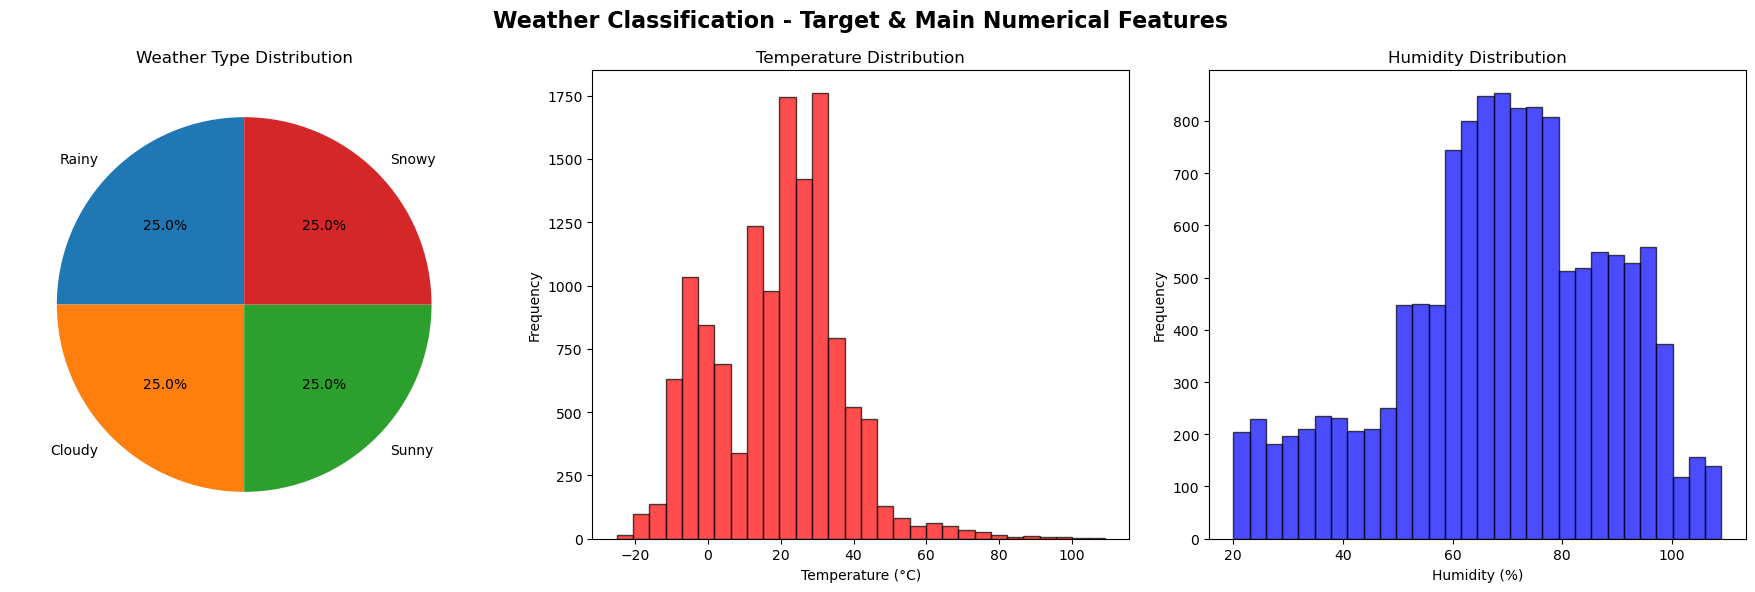

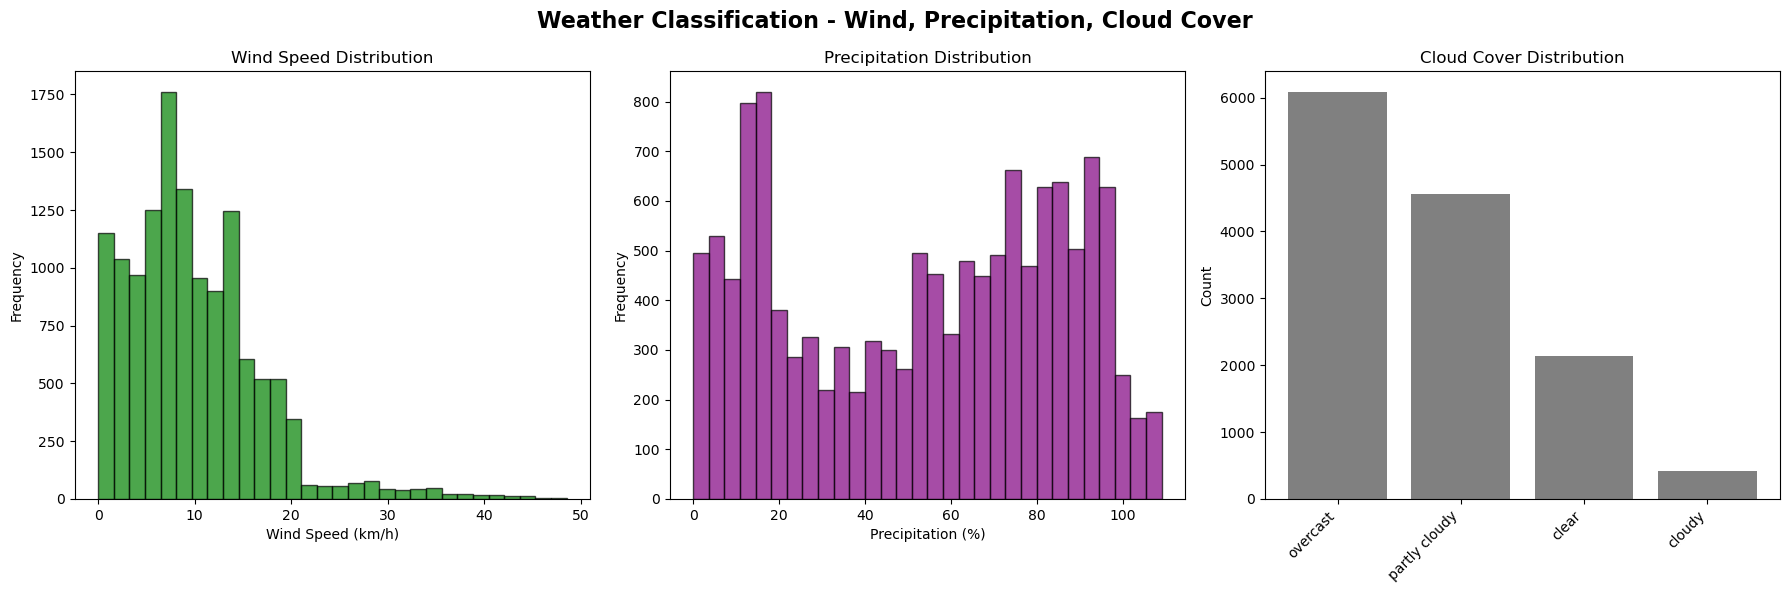

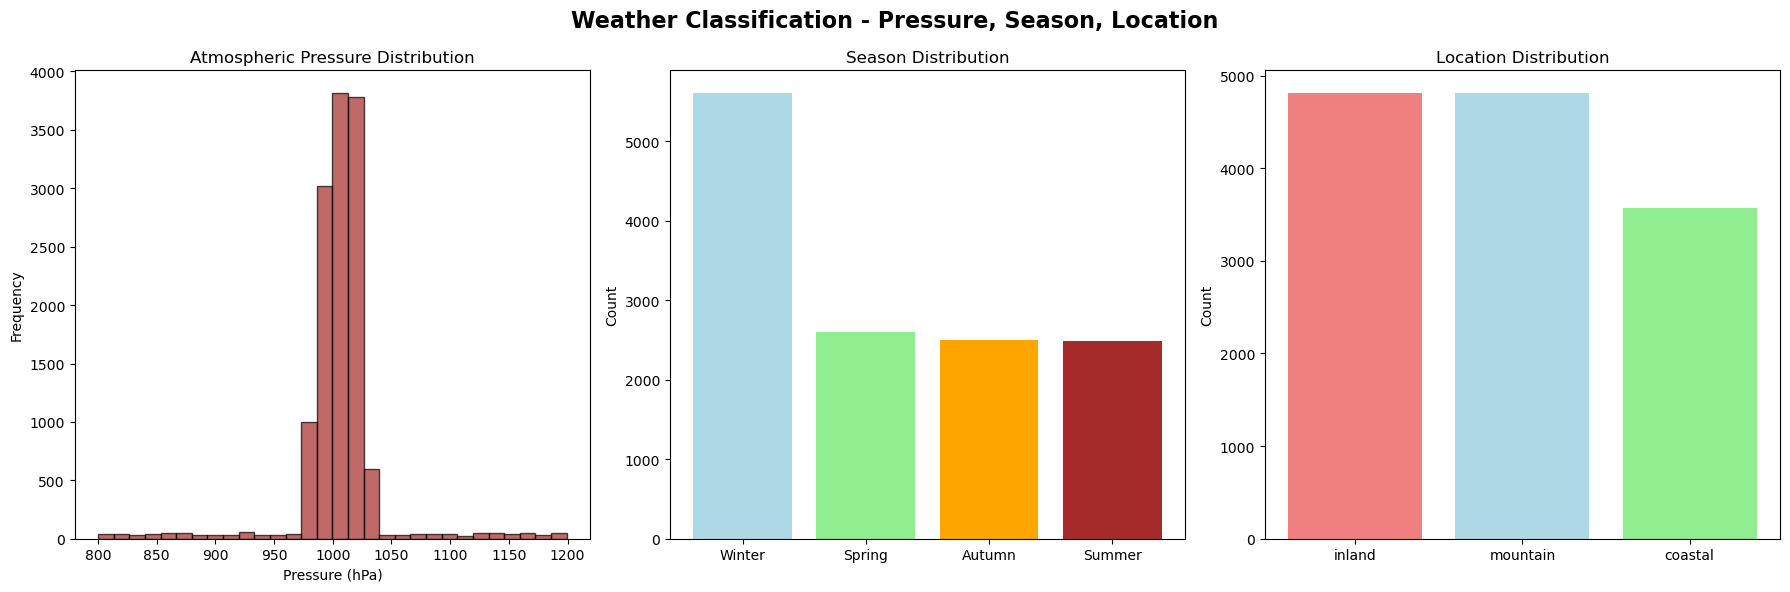

In [120]:
# Visualization of data

# --- Figure 1: Weather Type, Temperature, Humidity ---
fig1, axes1 = plt.subplots(1, 3, figsize=(18, 6))
fig1.suptitle('Weather Classification - Target & Main Numerical Features', fontsize=16, fontweight='bold')

# Weather Type Distribution (Pie)
weather_counts = weather_df['Weather Type'].value_counts()
axes1[0].pie(weather_counts.values, labels=weather_counts.index, autopct='%1.1f%%', startangle=90)
axes1[0].set_title('Weather Type Distribution')

# Temperature Distribution (Histogram)
axes1[1].hist(weather_df['Temperature'], bins=30, edgecolor='black', alpha=0.7, color='red')
axes1[1].set_title('Temperature Distribution')
axes1[1].set_xlabel('Temperature (°C)')
axes1[1].set_ylabel('Frequency')

# Humidity Distribution (Histogram)
axes1[2].hist(weather_df['Humidity'], bins=30, edgecolor='black', alpha=0.7, color='blue')
axes1[2].set_title('Humidity Distribution')
axes1[2].set_xlabel('Humidity (%)')
axes1[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# --- Figure 2: Wind Speed, Precipitation, Cloud Cover ---
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 6))
fig2.suptitle('Weather Classification - Wind, Precipitation, Cloud Cover', fontsize=16, fontweight='bold')

# Wind Speed Distribution (Histogram)
axes2[0].hist(weather_df['Wind Speed'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes2[0].set_title('Wind Speed Distribution')
axes2[0].set_xlabel('Wind Speed (km/h)')
axes2[0].set_ylabel('Frequency')

# Precipitation Distribution (Histogram)
axes2[1].hist(weather_df['Precipitation (%)'], bins=30, edgecolor='black', alpha=0.7, color='purple')
axes2[1].set_title('Precipitation Distribution')
axes2[1].set_xlabel('Precipitation (%)')
axes2[1].set_ylabel('Frequency')

# Cloud Cover Distribution (Bar)
cloud_counts = weather_df['Cloud Cover'].value_counts()
axes2[2].bar(range(len(cloud_counts)), cloud_counts.values, color='gray')
axes2[2].set_title('Cloud Cover Distribution')
axes2[2].set_xticks(range(len(cloud_counts)))
axes2[2].set_xticklabels(cloud_counts.index, rotation=45, ha='right')
axes2[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# --- Figure 3: Atmospheric Pressure, Season, Location ---
fig3, axes3 = plt.subplots(1, 3, figsize=(18, 6))
fig3.suptitle('Weather Classification - Pressure, Season, Location', fontsize=16, fontweight='bold')

# Atmospheric Pressure Distribution (Histogram)
axes3[0].hist(weather_df['Atmospheric Pressure'], bins=30, edgecolor='black', alpha=0.7, color='brown')
axes3[0].set_title('Atmospheric Pressure Distribution')
axes3[0].set_xlabel('Pressure (hPa)')
axes3[0].set_ylabel('Frequency')

# Season Distribution (Bar)
season_counts = weather_df['Season'].value_counts()
axes3[1].bar(season_counts.index, season_counts.values, color=['lightblue', 'lightgreen', 'orange', 'brown'])
axes3[1].set_title('Season Distribution')
axes3[1].set_ylabel('Count')

# Location Distribution (Bar)
location_counts = weather_df['Location'].value_counts()
axes3[2].bar(location_counts.index, location_counts.values, color=['lightcoral', 'lightblue', 'lightgreen'])
axes3[2].set_title('Location Distribution')
axes3[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


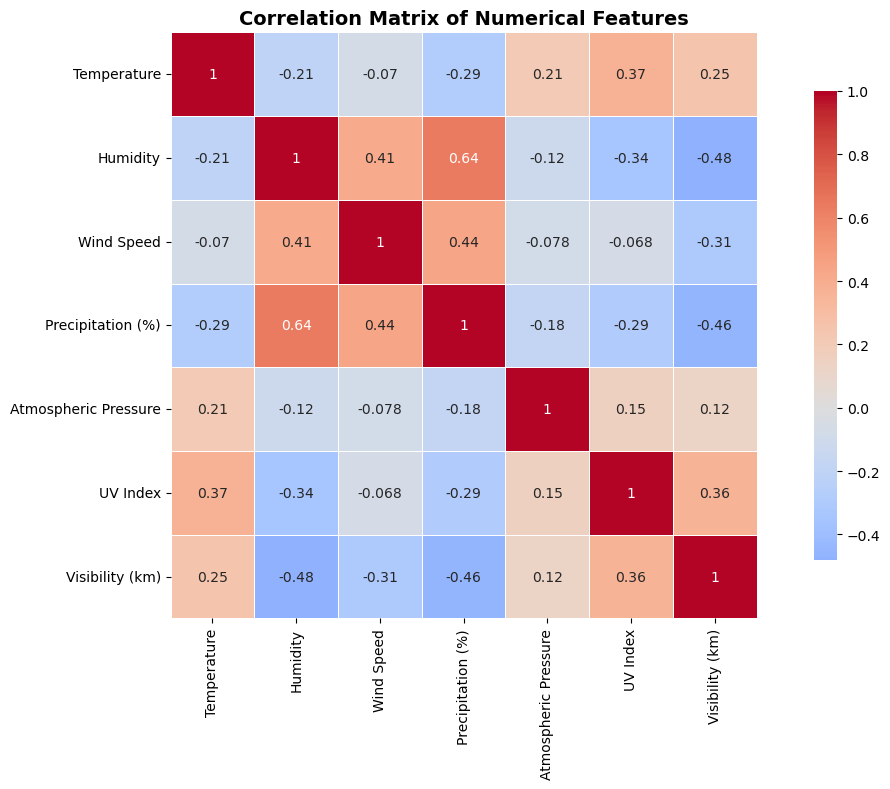

In [121]:
# Correlation Analysis
plt.figure(figsize=(12, 8))

# Correlation matrix for numerical features
correlation_matrix = weather_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


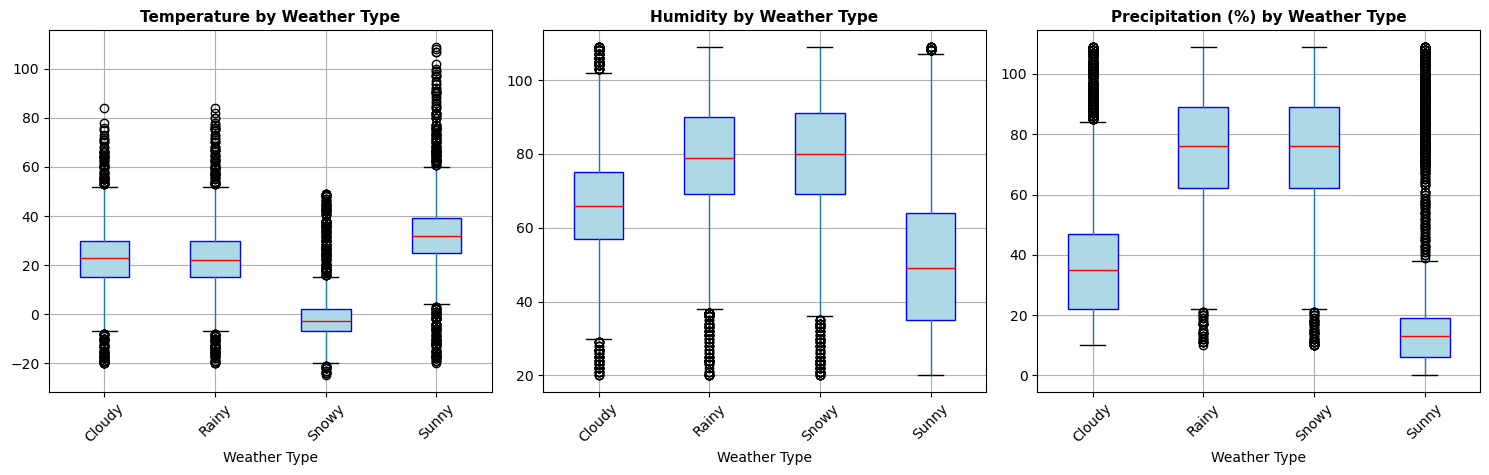

In [122]:
# Draw key features by Weather Type
# top 3 features to plot
top_features = ['Temperature', 'Humidity', 'Precipitation (%)']

plt.figure(figsize=(15, 5))
for i, col in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    weather_df.boxplot(column=col, by='Weather Type', ax=plt.gca(), patch_artist=True,
                       boxprops=dict(facecolor='lightblue', color='blue'),
                       medianprops=dict(color='red'))
    plt.title(f'{col} by Weather Type', fontsize=11, fontweight='bold')
    plt.suptitle('')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Data Cleaning and Preparation


In [123]:
# Check for missing values and data quality
print("Missing Values:")
missing_values = weather_df.isnull().sum()
print(missing_values[missing_values > 0])

print("\nDuplicate Rows:")
duplicate_count = weather_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Finding and Handling Outliers 
print("\nFinding and Handling Outliers (IQR method): \n")
weather_df_cp = weather_df.copy()
for col in numerical_features:
    Q1 = weather_df[col].quantile(0.25)
    Q3 = weather_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_iqr = weather_df[(weather_df[col] < lower_bound) | (weather_df[col] > upper_bound)]
    print(f"{col}: {len(outliers_iqr)} outliers detected by IQR method ({len(outliers_iqr)/len(weather_df)*100:.2f}%)")
    weather_df_cp[col] = np.where(weather_df[col] < lower_bound, lower_bound, weather_df[col])
    weather_df_cp[col] = np.where(weather_df[col] > upper_bound, upper_bound, weather_df[col])

weather_df = weather_df_cp.copy()


Missing Values:
Series([], dtype: int64)

Duplicate Rows:
Number of duplicate rows: 0

Finding and Handling Outliers (IQR method): 

Temperature: 92 outliers detected by IQR method (0.70%)
Humidity: 0 outliers detected by IQR method (0.00%)
Wind Speed: 404 outliers detected by IQR method (3.06%)
Precipitation (%): 0 outliers detected by IQR method (0.00%)
Atmospheric Pressure: 927 outliers detected by IQR method (7.02%)
UV Index: 0 outliers detected by IQR method (0.00%)
Visibility (km): 383 outliers detected by IQR method (2.90%)


In [124]:
# Data cleaning and preprocessing
weather_clean = weather_df.copy()

# Handle categorical variables - encode them
le_season = LabelEncoder()
le_location = LabelEncoder()
le_cloud_cover = LabelEncoder()
le_weather_type = LabelEncoder()

# Encode categorical variables
weather_clean['Season'] = le_season.fit_transform(weather_clean['Season'])
weather_clean['Location'] = le_location.fit_transform(weather_clean['Location'])
weather_clean['Cloud Cover'] = le_cloud_cover.fit_transform(weather_clean['Cloud Cover'])
weather_clean['Weather Type'] = le_weather_type.fit_transform(weather_clean['Weather Type'])

print("Categorical variables encoded successfully!")
print(f"Season mapping: {dict(zip(le_season.classes_, le_season.transform(le_season.classes_)))}")
print(f"Location mapping: {dict(zip(le_location.classes_, le_location.transform(le_location.classes_)))}")
print(f"Cloud Cover mapping: {dict(zip(le_cloud_cover.classes_, le_cloud_cover.transform(le_cloud_cover.classes_)))}")
print(f"Weather Type mapping: {dict(zip(le_weather_type.classes_, le_weather_type.transform(le_weather_type.classes_)))}")

# Prepare features and target for machine learning
feature_columns = numerical_features + ['Season', 'Location', 'Cloud Cover']
X = weather_clean[feature_columns]
y = weather_clean['Weather Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTrain set size: {X_train.shape[0]}")
print(f"Train target distribution: {np.bincount(y_train)}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Test target distribution: {np.bincount(y_test)}")



Categorical variables encoded successfully!
Season mapping: {'Autumn': 0, 'Spring': 1, 'Summer': 2, 'Winter': 3}
Location mapping: {'coastal': 0, 'inland': 1, 'mountain': 2}
Cloud Cover mapping: {'clear': 0, 'cloudy': 1, 'overcast': 2, 'partly cloudy': 3}
Weather Type mapping: {'Cloudy': 0, 'Rainy': 1, 'Snowy': 2, 'Sunny': 3}

Train set size: 9240
Train target distribution: [2310 2310 2310 2310]
Test set size: 3960
Test target distribution: [990 990 990 990]


In [125]:
# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling : \n")
print("Features scaled using StandardScaler")
print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")


Feature Scaling : 

Features scaled using StandardScaler
Scaled training set shape: (9240, 10)
Scaled test set shape: (3960, 10)


# Task 2: Support Vector Machine Implementation and Visualization



In [126]:
# GridSearchCV for SVM Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10],                    
    'kernel': ['rbf', 'linear'],   
    'gamma': ['auto']    
}

# Initialize GridSearchCV
svm_grid = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid=param_grid,
    cv=3,                      
    scoring='accuracy',        
    n_jobs=-1,                 
    verbose=1,                 
    return_train_score=True
)

# Fit GridSearchCV
svm_grid.fit(X_train_scaled, y_train)

print(f"\nBest Parameters Found:")
for param, value in svm_grid.best_params_.items():
    print(f"  • {param}: {value}")

cv_best_score = svm_grid.best_score_.round(2)
print(f"\nBest Cross-Validation Score: {cv_best_score}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best Parameters Found:
  • C: 1
  • gamma: auto
  • kernel: rbf

Best Cross-Validation Score: 0.91


In [127]:
# Create and train SVM model using best parameters
svm_model = SVC(**svm_grid.best_params_, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)


In [128]:
# Evaluate SVM model performance (accuracy, precision, recall, f1-score)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

print(f"Accuracy: {svm_accuracy:.3f}")
print(f"Precision: {svm_precision:.3f}")
print(f"Recall: {svm_recall:.3f}")
print(f"F1-Score: {svm_f1:.3f}")

# Detailed classification report
print(f"\nClassification Report:\n ")
svm_report = classification_report(y_test, y_pred_svm,target_names=le_weather_type.classes_)
print(svm_report)

# Cross-validation score
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


Accuracy: 0.904
Precision: 0.906
Recall: 0.904
F1-Score: 0.905

Classification Report:
 
              precision    recall  f1-score   support

      Cloudy       0.85      0.90      0.87       990
       Rainy       0.90      0.92      0.91       990
       Snowy       0.95      0.91      0.93       990
       Sunny       0.92      0.89      0.91       990

    accuracy                           0.90      3960
   macro avg       0.91      0.90      0.90      3960
weighted avg       0.91      0.90      0.90      3960


Cross-validation scores: [0.9047619  0.91233766 0.91720779 0.90313853 0.91504329]
Mean CV score: 0.910 (+/- 0.011)


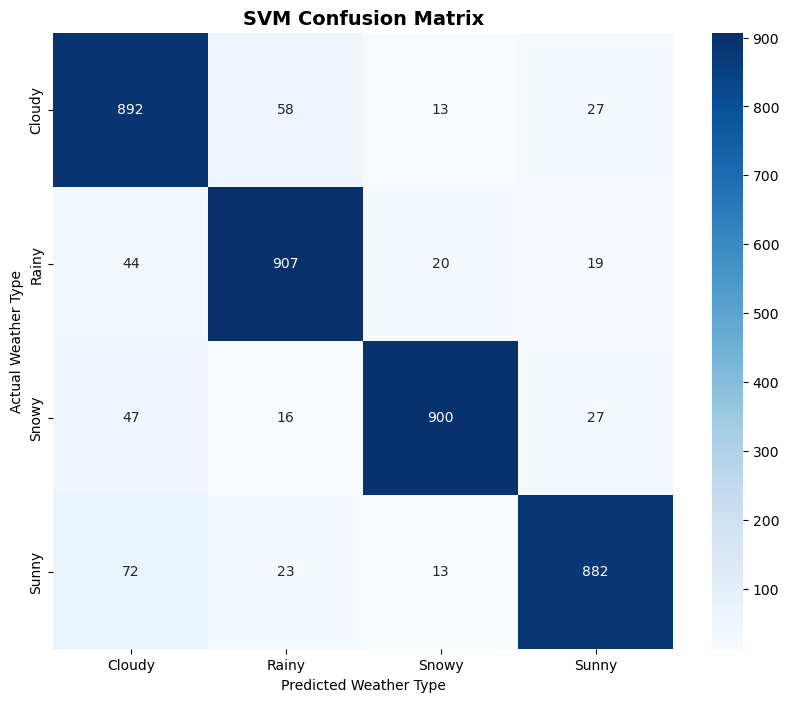

In [129]:
# SVM Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_weather_type.classes_, 
            yticklabels=le_weather_type.classes_)
plt.title('SVM Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Weather Type')
plt.ylabel('Actual Weather Type')
plt.show()


Explained variance ratio (first 3 components): [0.32190043 0.13750832 0.10031644]


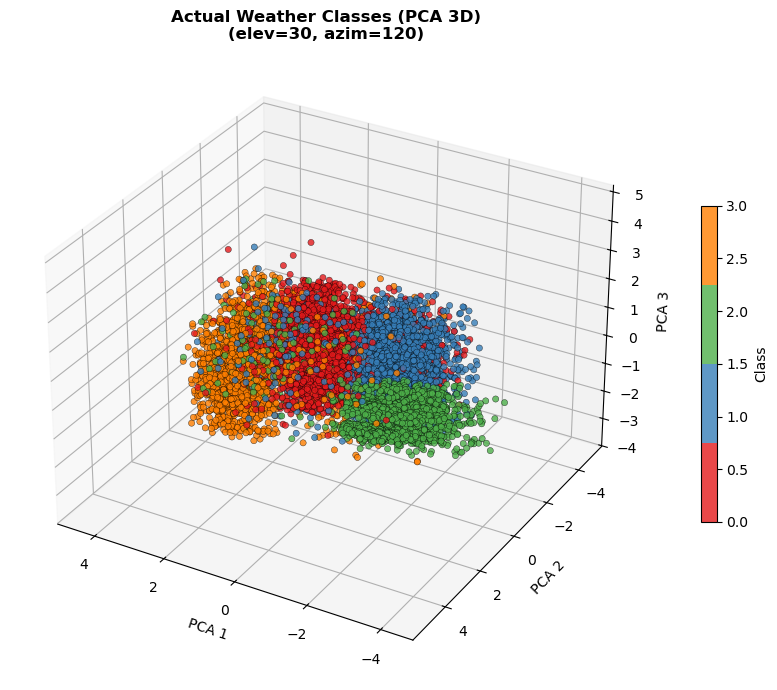

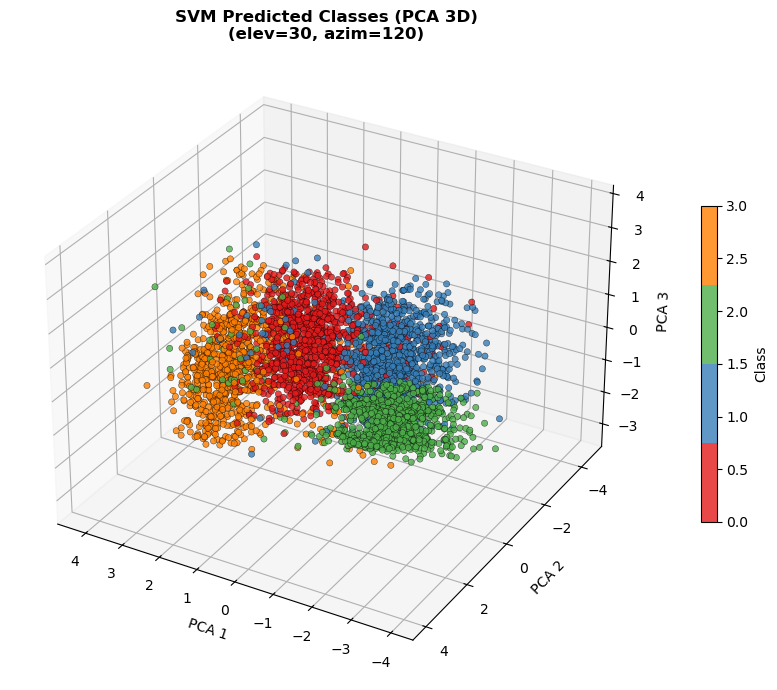

In [130]:
# 3D Visualization of SVM weather classesusing PCA for dimensionality reduction
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Fit PCA on the scaled training data to reduce to 3 principal components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained variance ratio (first 3 components):", pca.explained_variance_ratio_)

# Example: Red, Blue, Green, Orange (very distinct)
custom_cmap = ListedColormap(['#e41a1c', '#377eb8', '#4daf4a', '#ff7f00'])

# Only draw for (30, 120)
elev, azim = (30, 120)

# 3D scatter plot of actual classes
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2],
    c=y_train, cmap=custom_cmap, alpha=0.8, s=20, marker='o', edgecolor='k', linewidth=0.3
)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title(f'Actual Weather Classes (PCA 3D)\n(elev={elev}, azim={azim})', fontsize=12, fontweight='bold')
ax.view_init(elev=elev, azim=azim)
plt.colorbar(scatter, ax=ax, shrink=0.5, label='Class')
plt.tight_layout()
plt.show()

# 3D scatter plot of predicted classes 
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
scatter2 = ax.scatter(
    X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2],
    c=y_pred_svm, cmap=custom_cmap, alpha=0.8, s=20, marker='o', edgecolor='k', linewidth=0.3
)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title(f'SVM Predicted Classes (PCA 3D)\n(elev={elev}, azim={azim})', fontsize=12, fontweight='bold')
ax.view_init(elev=elev, azim=azim)
plt.colorbar(scatter2, ax=ax, shrink=0.5, label='Class')
plt.tight_layout()
plt.show()


Explained variance ratio (first 3 components): [0.32190043 0.13750832 0.10031644]


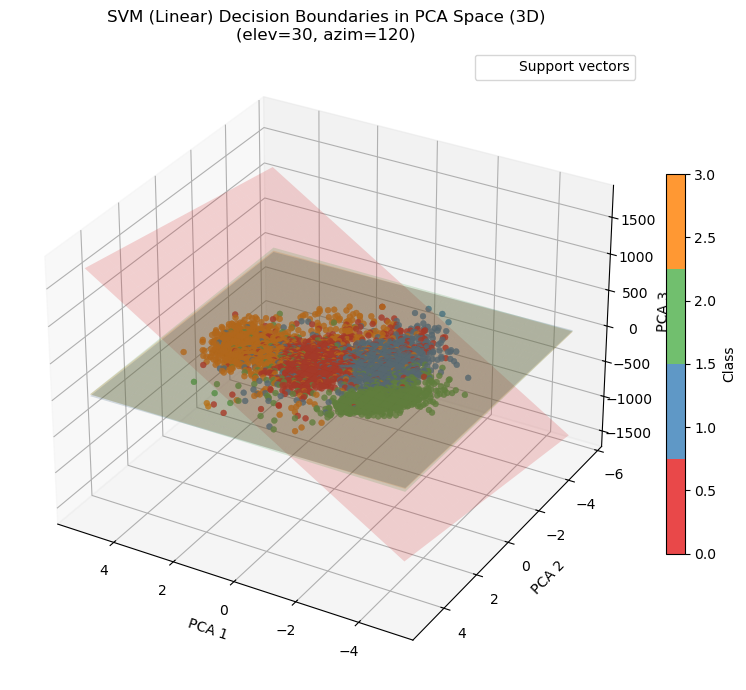

In [131]:

# 3D Visualization of SVM (linear kernel) decision boundaries in PCA space for (30, 120)
from matplotlib.colors import ListedColormap

# Fit PCA (3 components) on training data and transform both splits
pca = PCA(n_components=3, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained variance ratio (first 3 components):", pca.explained_variance_ratio_)

# Distinct colors for up to 4 classes
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#ff7f00']
cmap = ListedColormap(colors)

# Train linear SVM in PCA space (one-vs-rest by default for multi-class)
svm_pca_linear = SVC(kernel='linear', decision_function_shape='ovr', probability=False, random_state=42)
svm_pca_linear.fit(X_train_pca, y_train)

support_vectors = svm_pca_linear.support_vectors_
classes_ = svm_pca_linear.classes_
n_classes = len(classes_)

# Figure and 3D axes
elev, azim = 30, 120
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter test points colored by true label
scatter = ax.scatter(
    X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2],
    c=y_test, cmap=cmap, alpha=0.8, s=18, marker='o',
     linewidths=0.3
)

# Plot support vectors (hollow markers)
ax.scatter(
    support_vectors[:, 0], support_vectors[:, 1], support_vectors[:, 2],
    s=60, facecolors='none',  linewidths=1.2, label='Support vectors'
)

# Create a mesh grid for decision planes
x_min, x_max = X_test_pca[:, 0].min() - 1.0, X_test_pca[:, 0].max() + 1.0
y_min, y_max = X_test_pca[:, 1].min() - 1.0, X_test_pca[:, 1].max() + 1.0
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 30),
    np.linspace(y_min, y_max, 30)
)

# Plot separating planes: w0*x + w1*y + w2*z + b = 0  =>  z = -(w0*x + w1*y + b)/w2
for i in range(n_classes):
    w = svm_pca_linear.coef_[i]
    b = svm_pca_linear.intercept_[i]
    if np.abs(w[2]) < 1e-12:
        continue  # skip near-vertical planes
    zz = -(w[0] * xx + w[1] * yy + b) / w[2]
    ax.plot_surface(
        xx, yy, zz,
        color=colors[i % len(colors)], alpha=0.18, linewidth=0, antialiased=True
    )

# Axes formatting
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title(f'SVM (Linear) Decision Boundaries in PCA Space (3D)\n(elev={elev}, azim={azim})')

# Colorbar mapped to class labels
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, pad=0.02)
cbar.set_label('Class')

# Build legend: support vectors only (classes shown via colorbar)
ax.legend(loc='upper right')

# View and layout
ax.view_init(elev=elev, azim=azim)
plt.tight_layout()
plt.show()

# Task 3: Advanced Classification Algorithms


In [132]:
# Find best parameters for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV to find best parameters
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest Parameters Found:")
for param, value in grid_search.best_params_.items():
    print(f"  • {param}: {value}")

# Use the best estimator for predictions and evaluation
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)


Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best Parameters Found:
  • min_samples_leaf: 1
  • min_samples_split: 10
  • n_estimators: 200


In [133]:
# Evaluate Random Forest performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"\nRF Performance:")
print(f"Accuracy: {rf_accuracy:.3f}")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall: {rf_recall:.3f}")
print(f"F1-Score: {rf_f1:.3f}")

# Detailed classification report
print(f"\nClassification Report:\n ")
rf_report = classification_report(y_test, y_pred_rf,target_names=le_weather_type.classes_)
print(rf_report)

# Cross-validation score using the best estimator
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print(f"\nCross-validation scores: {rf_cv_scores}")
print(f"Mean CV score: {rf_cv_scores.mean():.3f} (+/- {rf_cv_scores.std() * 2:.3f})")


RF Performance:
Accuracy: 0.912
Precision: 0.914
Recall: 0.912
F1-Score: 0.912

Classification Report:
 
              precision    recall  f1-score   support

      Cloudy       0.86      0.92      0.89       990
       Rainy       0.90      0.91      0.91       990
       Snowy       0.96      0.91      0.93       990
       Sunny       0.94      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960


Cross-validation scores: [0.90746753 0.9237013  0.91991342 0.91450216 0.91883117]
Mean CV score: 0.917 (+/- 0.011)


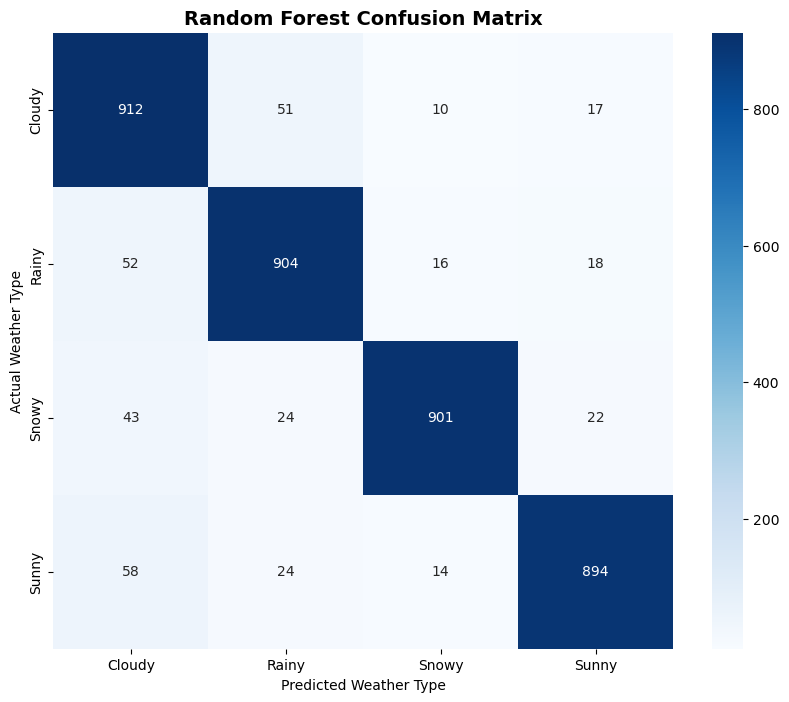

In [134]:
# Random Forest Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_weather_type.classes_, 
            yticklabels=le_weather_type.classes_)
plt.title('Random Forest Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Weather Type')
plt.ylabel('Actual Weather Type')
plt.show()


In [135]:
# Random Forest Feature Importance
feature_importance = best_rf_model.feature_importances_
feature_names = feature_columns

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance RF : ")
display(importance_df)


Feature Importance RF : 


,Feature,Importance
0,Temperature,0.216482
6,Visibility (km),0.154535
5,UV Index,0.146472
3,Precipitation (%),0.143393
4,Atmospheric Pressure,0.112449
9,Cloud Cover,0.098385
1,Humidity,0.049465
7,Season,0.041490
2,Wind Speed,0.025834
8,Location,0.011494


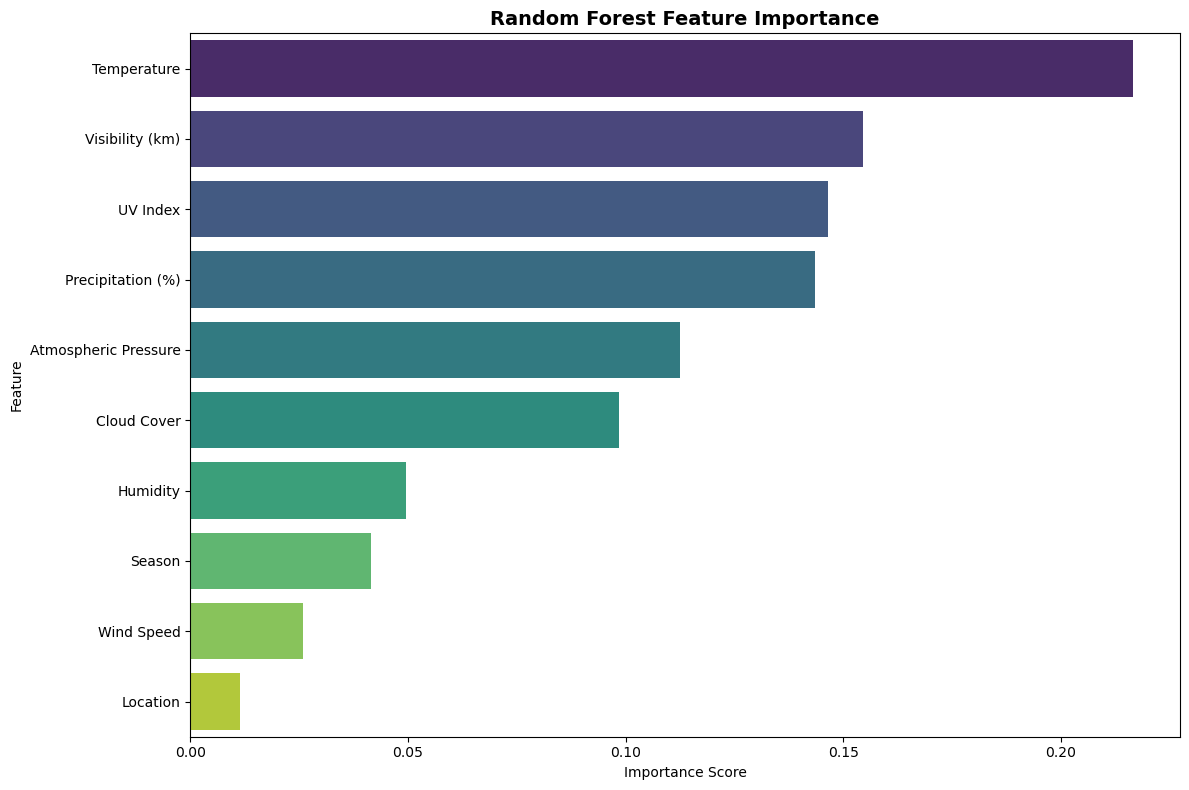

In [136]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


### 3.2 XGBoost Classification


In [137]:
# XGBoost Classification create and train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model 
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)


In [138]:
# Evaluate XGBoost performance
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb, average='weighted')
xgb_recall = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

print(f"\nXGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-Score: {xgb_f1:.4f}")

# Detailed classification report
print(f"\nClassification Report:\n ")
xgb_report = classification_report(y_test, y_pred_xgb,target_names=le_weather_type.classes_)
print(xgb_report)

# Cross-validation score
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"\nCross-validation scores: {xgb_cv_scores}")
print(f"Mean CV score: {xgb_cv_scores.mean():.4f} (+/- {xgb_cv_scores.std() * 2:.4f})")


XGBoost Performance:
Accuracy: 0.9098
Precision: 0.9107
Recall: 0.9098
F1-Score: 0.9101

Classification Report:
 
              precision    recall  f1-score   support

      Cloudy       0.87      0.91      0.89       990
       Rainy       0.90      0.91      0.90       990
       Snowy       0.95      0.91      0.93       990
       Sunny       0.93      0.91      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960


Cross-validation scores: [0.90909091 0.91720779 0.91666667 0.91287879 0.91774892]
Mean CV score: 0.9147 (+/- 0.0066)


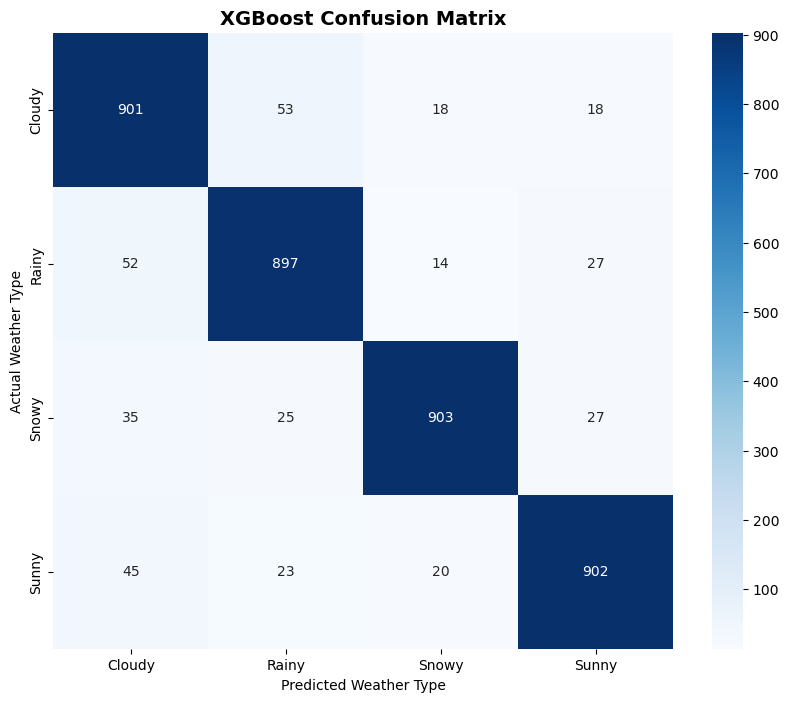

In [139]:
# XGBoost Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_weather_type.classes_, 
            yticklabels=le_weather_type.classes_)
plt.title('XGBoost Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Weather Type')
plt.ylabel('Actual Weather Type')
plt.show()


In [140]:
# XGBoost Feature Importance
feature_importance_xgb = xgb_model.feature_importances_
feature_names = feature_columns

# Feature importance for XGBoost
importance_df_xgb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_xgb
}).sort_values('Importance', ascending=False)

print("Feature Importance XGBoost : ")
display(importance_df_xgb)

Feature Importance XGBoost : 


,Feature,Importance
9,Cloud Cover,0.239809
5,UV Index,0.204027
0,Temperature,0.204021
6,Visibility (km),0.119740
3,Precipitation (%),0.089052
7,Season,0.050265
4,Atmospheric Pressure,0.044264
2,Wind Speed,0.020275
1,Humidity,0.018036
8,Location,0.010510


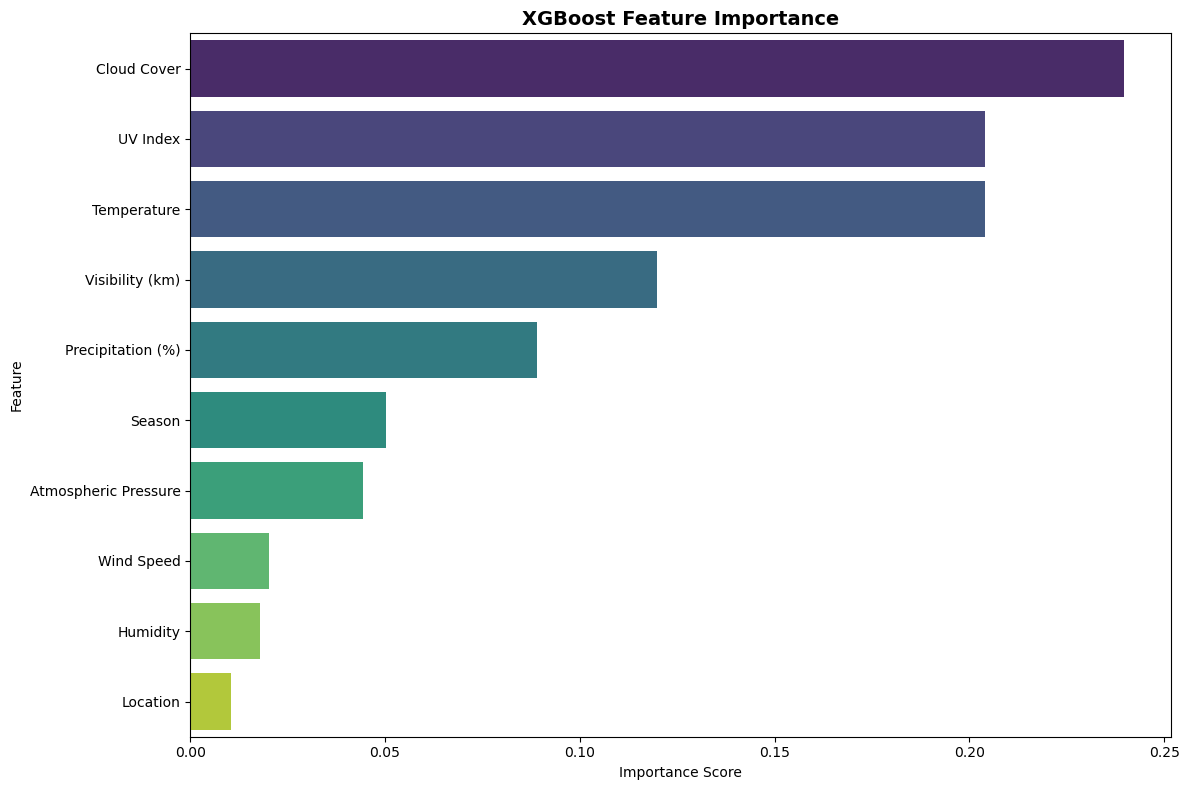

In [141]:
# Visualize XGBoost feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df_xgb, x='Importance', y='Feature', palette='viridis')
plt.title('XGBoost Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()



### 3.3 Model Comparison


,Model,Accuracy,Precision,Recall,F1-Score
0,SVM,0.904293,0.905955,0.904293,0.904698
1,Random Forest,0.911869,0.913797,0.911869,0.912284
2,XGBoost,0.909848,0.910661,0.909848,0.910060


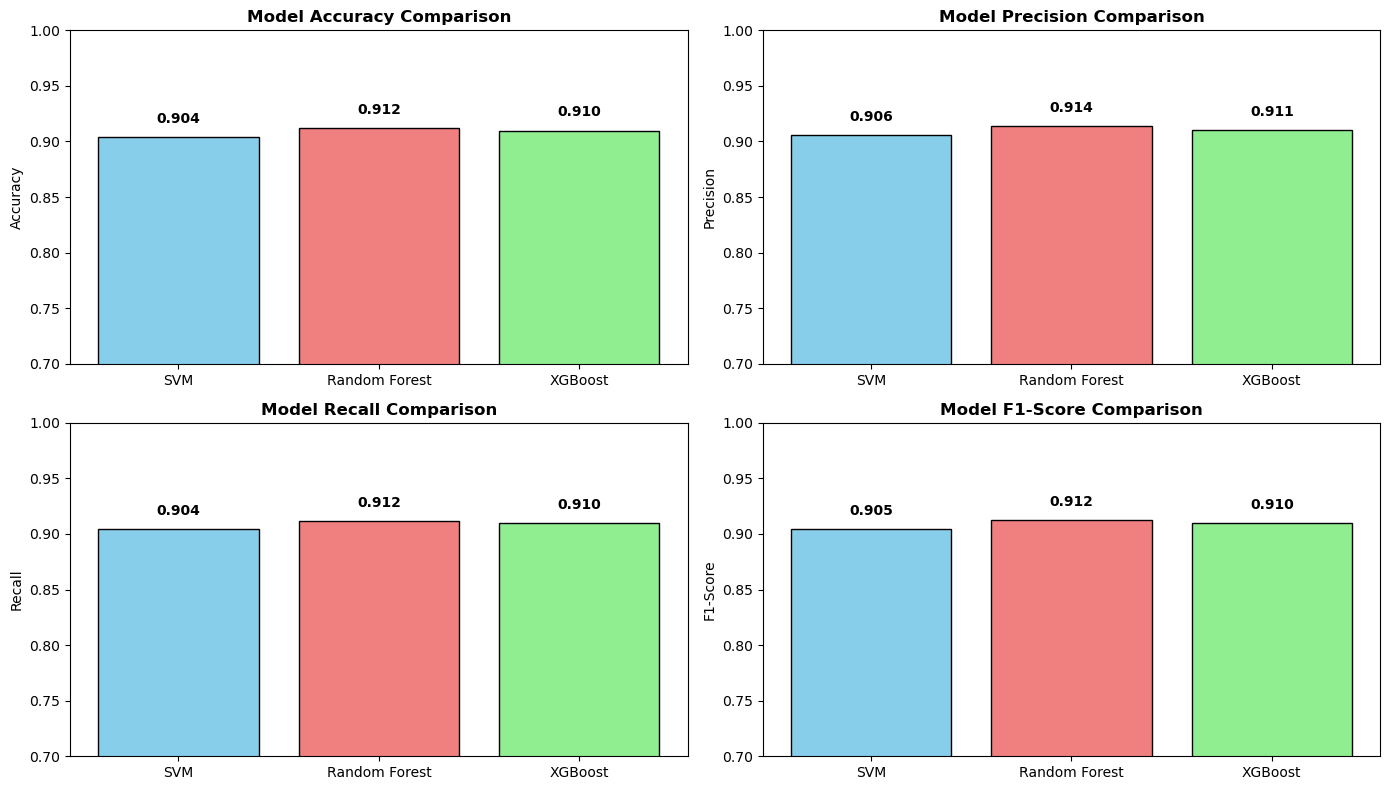

In [142]:
# Model Comparison

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['SVM', 'Random Forest', 'XGBoost'],
    'Accuracy': [svm_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [svm_precision, rf_precision, xgb_precision],
    'Recall': [svm_recall, rf_recall, xgb_recall],
    'F1-Score': [svm_f1, rf_f1, xgb_f1]
})

# comparison_df = pd.DataFrame({
#     'Model': ['Random Forest', 'XGBoost'],
#     'Accuracy': [rf_accuracy, xgb_accuracy],
#     'Precision': [rf_precision, xgb_precision],
#     'Recall': [rf_recall, xgb_recall],
#     'F1-Score': [rf_f1, xgb_f1]
# })

display(comparison_df)

# Visualize model comparison
plt.figure(figsize=(14, 8))

# Accuracy comparison
plt.subplot(2, 2, 1)
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Precision comparison
plt.subplot(2, 2, 2)
bars = plt.bar(comparison_df['Model'], comparison_df['Precision'], color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Model Precision Comparison', fontsize=12, fontweight='bold')
plt.ylabel('Precision')
plt.ylim([0.7, 1.0])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Recall comparison
plt.subplot(2, 2, 3)
bars = plt.bar(comparison_df['Model'], comparison_df['Recall'], color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Model Recall Comparison', fontsize=12, fontweight='bold')
plt.ylabel('Recall')
plt.ylim([0.7, 1.0])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# F1-Score comparison
plt.subplot(2, 2, 4)
bars = plt.bar(comparison_df['Model'], comparison_df['F1-Score'], color=['skyblue', 'lightcoral', 'lightgreen'], edgecolor='black')
plt.title('Model F1-Score Comparison', fontsize=12, fontweight='bold')
plt.ylabel('F1-Score')
plt.ylim([0.7, 1.0])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


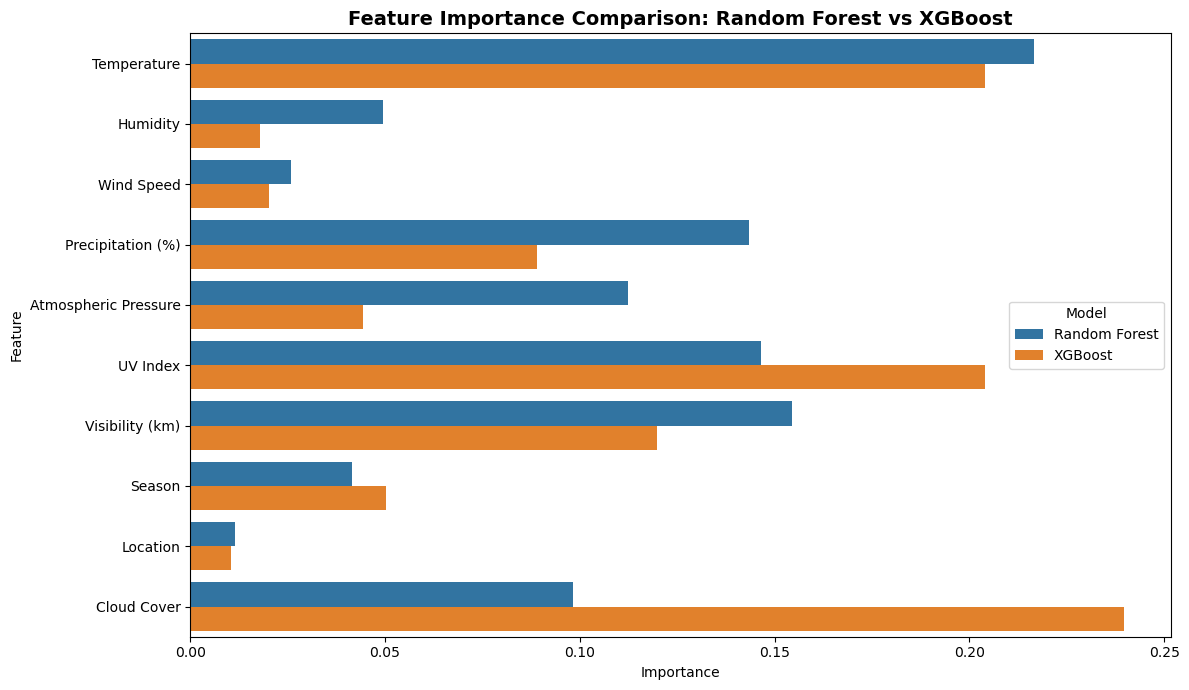

,Feature,Importance,Model
0,Temperature,0.216482,Random Forest
1,Visibility (km),0.154535,Random Forest
2,UV Index,0.146472,Random Forest
3,Precipitation (%),0.143393,Random Forest
4,Atmospheric Pressure,0.112449,Random Forest
5,Cloud Cover,0.098385,Random Forest
6,Humidity,0.049465,Random Forest
7,Season,0.041490,Random Forest
8,Wind Speed,0.025834,Random Forest
9,Location,0.011494,Random Forest


,Feature,Importance,Model
0,Cloud Cover,0.239809,XGBoost
1,UV Index,0.204027,XGBoost
2,Temperature,0.204021,XGBoost
3,Visibility (km),0.119740,XGBoost
4,Precipitation (%),0.089052,XGBoost
5,Season,0.050265,XGBoost
6,Atmospheric Pressure,0.044264,XGBoost
7,Wind Speed,0.020275,XGBoost
8,Humidity,0.018036,XGBoost
9,Location,0.010510,XGBoost


In [143]:
# Feature Importance Comparison for Random Forest and XGBoost

importances_rf = best_rf_model.feature_importances_
importances_xgb = xgb_model.feature_importances_

features = X_train.columns

# Create DataFrames for feature importances
fi_rf = pd.DataFrame({'Feature': features, 'Importance': importances_rf})
fi_rf['Model'] = 'Random Forest'
fi_xgb = pd.DataFrame({'Feature': features, 'Importance': importances_xgb})
fi_xgb['Model'] = 'XGBoost'

# Combine for comparison
fi_all = pd.concat([fi_rf, fi_xgb], ignore_index=True)

# Plot feature importances side by side
plt.figure(figsize=(12, 7))
sns.barplot(data=fi_all, x='Importance', y='Feature', hue='Model')
plt.title('Feature Importance Comparison: Random Forest vs XGBoost', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# Display feature importances as tables for both models
display(fi_rf.sort_values('Importance', ascending=False).reset_index(drop=True))
display(fi_xgb.sort_values('Importance', ascending=False).reset_index(drop=True))


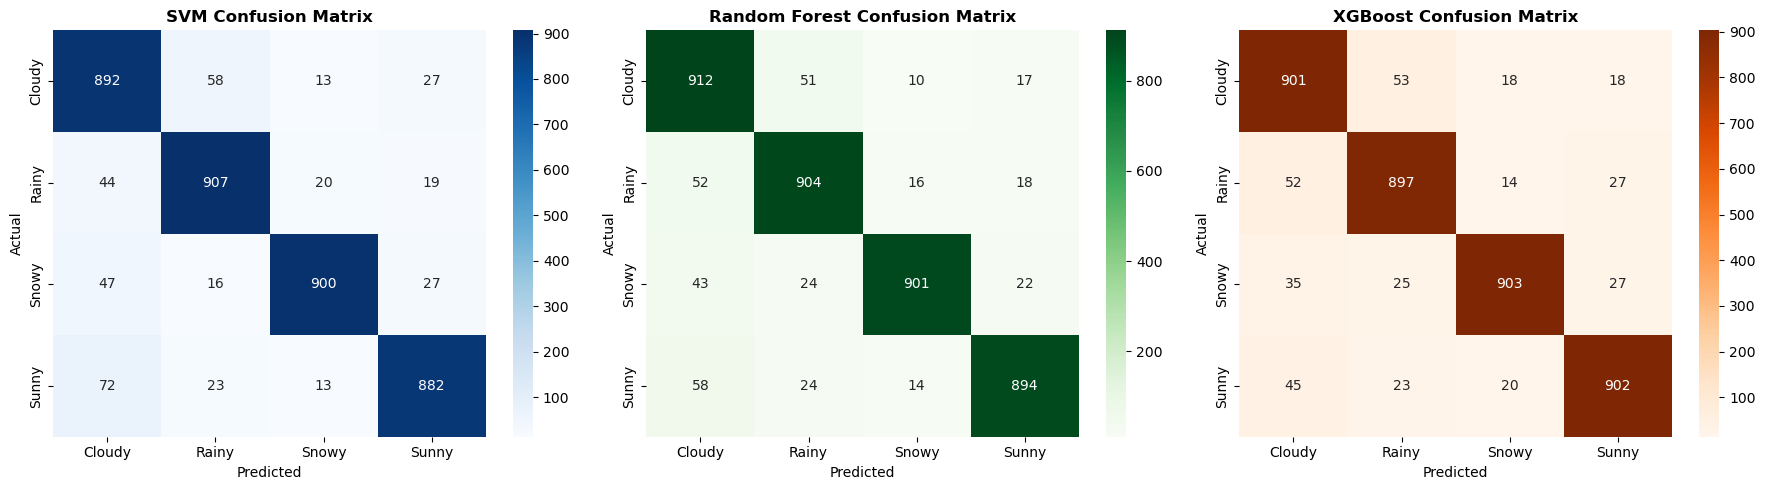

In [144]:
# Confusion Matrices Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=le_weather_type.classes_, 
            yticklabels=le_weather_type.classes_)
axes[0].set_title('SVM Confusion Matrix', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=le_weather_type.classes_, 
            yticklabels=le_weather_type.classes_)
axes[1].set_title('Random Forest Confusion Matrix', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
            xticklabels=le_weather_type.classes_, 
            yticklabels=le_weather_type.classes_)
axes[2].set_title('XGBoost Confusion Matrix', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()
